<h3>Linear Regression</h3>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
ipl = pd.read_csv("D:\\MachineLearning\\DataSets\\IPL IMB381IPL2013.csv")

# Drop unnecessary columns (like player name, team, etc.)
ipl_clean = ipl.drop(["Sl.NO.", "PLAYER NAME", "TEAM", "COUNTRY", "PLAYING ROLE"], axis=1)

# Encode categorical variables if any (already removed major ones)
# but still, check if non-numeric columns exist
for col in ipl_clean.columns:
    if ipl_clean[col].dtype == 'object':
        le = LabelEncoder()
        ipl_clean[col] = le.fit_transform(ipl_clean[col])

# Define features (X) and target (y)
X = ipl_clean.drop("SOLD PRICE", axis=1)
y = ipl_clean["SOLD PRICE"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predictions
y_pred = linreg.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Show first 10 actual vs predicted prices
comparison = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": y_pred
})
comparison.head(10)


Mean Squared Error: 83003641957.75284
R2 Score: 0.39060046740764676


,Actual Price,Predicted Price
0,900000,6.468790e+05
1,150000,8.277182e+04
2,300000,8.466728e+05
3,325000,5.832749e+05
4,150000,1.869919e+05
5,225000,3.322011e+05
6,600000,4.502163e+05
7,625000,4.324646e+05
8,925000,8.546874e+05
9,800000,1.143119e+06


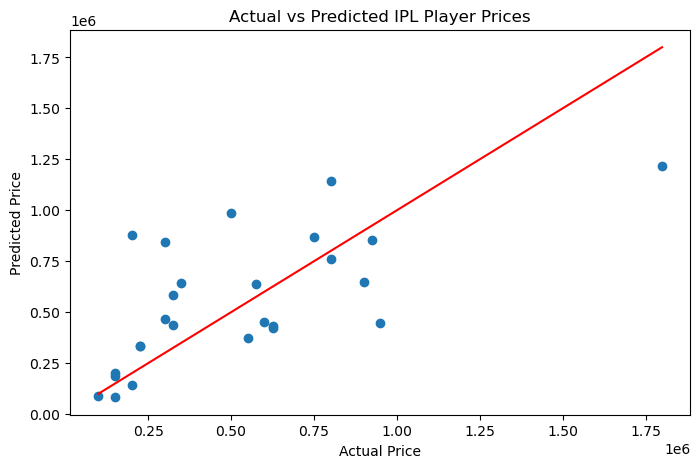

In [2]:
import matplotlib.pyplot as plt
# -----------------------------
#        Plotting
# -----------------------------
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted IPL Player Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")  # reference line

plt.show()